##1. Вибір даних

У якості навчального датасету обрано Kuzushiji-MNIST, який містить зображення японських рукописних символів і є складнішим за класичний MNIST і Fashion-MNIST

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
# Завантажуємо датасет
transform = transforms.Compose([
    transforms.ToTensor()
])

train_data = datasets.KMNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.KMNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)

100%|██████████| 18.2M/18.2M [00:15<00:00, 1.16MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 3.04M/3.04M [00:02<00:00, 1.09MB/s]
100%|██████████| 5.12k/5.12k [00:00<00:00, 12.9MB/s]


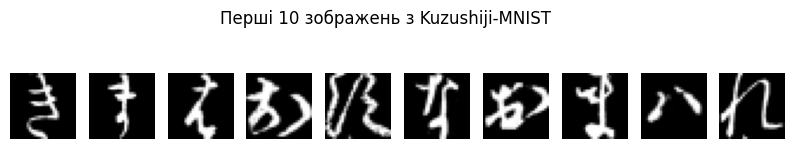

In [4]:
# Перевіримо кілька перших зображень з KMNIST
import matplotlib.pyplot as plt

examples = next(iter(train_loader))
images, labels = examples

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Перші 10 зображень з Kuzushiji-MNIST")
plt.show()

##2. Архітектура VAE

In [5]:
class VAE(nn.Module):
    def __init__(self, latent_dim=10):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(28*28, 400)
        self.fc21 = nn.Linear(400, latent_dim)
        self.fc22 = nn.Linear(400, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 28*28)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc21(h), self.fc22(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Функція втрат
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

##3. Тренування моделі

Epoch   1/100 | Train Loss: 277.0972 | Val Loss: 252.2000
Epoch   2/100 | Train Loss: 238.2069 | Val Loss: 244.3085
Epoch   3/100 | Train Loss: 232.0343 | Val Loss: 240.9951
Epoch   4/100 | Train Loss: 228.7115 | Val Loss: 239.1892
Epoch   5/100 | Train Loss: 226.4875 | Val Loss: 237.3689
Epoch   6/100 | Train Loss: 224.8437 | Val Loss: 236.5203
Epoch   7/100 | Train Loss: 223.4705 | Val Loss: 235.4341
Epoch   8/100 | Train Loss: 222.3473 | Val Loss: 234.5765
Epoch   9/100 | Train Loss: 221.3666 | Val Loss: 234.3490
Epoch  10/100 | Train Loss: 220.4636 | Val Loss: 233.7667
Epoch  11/100 | Train Loss: 219.7176 | Val Loss: 232.9106
Epoch  12/100 | Train Loss: 218.9578 | Val Loss: 232.3647
Epoch  13/100 | Train Loss: 218.3859 | Val Loss: 232.1231
Epoch  14/100 | Train Loss: 217.7820 | Val Loss: 231.4473
Epoch  15/100 | Train Loss: 217.2376 | Val Loss: 231.1515
Epoch  16/100 | Train Loss: 216.8047 | Val Loss: 230.8771
Epoch  17/100 | Train Loss: 216.3382 | Val Loss: 230.8940
Epoch  18/100 

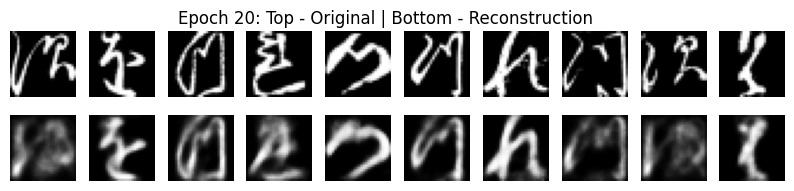

Epoch  21/100 | Train Loss: 214.8621 | Val Loss: 229.7614
Epoch  22/100 | Train Loss: 214.6146 | Val Loss: 229.6185
Epoch  23/100 | Train Loss: 214.2864 | Val Loss: 229.3477
Epoch  24/100 | Train Loss: 214.0073 | Val Loss: 229.2174
Epoch  25/100 | Train Loss: 213.7586 | Val Loss: 229.1074
Epoch  26/100 | Train Loss: 213.5258 | Val Loss: 228.9615
Epoch  27/100 | Train Loss: 213.3410 | Val Loss: 229.1553
Epoch  28/100 | Train Loss: 213.0717 | Val Loss: 228.4390
Epoch  29/100 | Train Loss: 212.9016 | Val Loss: 228.5127
Epoch  30/100 | Train Loss: 212.6873 | Val Loss: 228.6262
Epoch  31/100 | Train Loss: 212.5257 | Val Loss: 228.2443
Epoch  32/100 | Train Loss: 212.2765 | Val Loss: 228.3827
Epoch  33/100 | Train Loss: 212.1857 | Val Loss: 228.2004
Epoch  34/100 | Train Loss: 212.0354 | Val Loss: 228.1555
Epoch  35/100 | Train Loss: 211.8364 | Val Loss: 228.1968
Epoch  36/100 | Train Loss: 211.7385 | Val Loss: 227.9218
Epoch  37/100 | Train Loss: 211.5564 | Val Loss: 227.9970
Epoch  38/100 

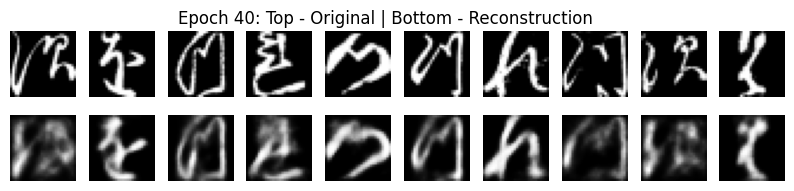

Epoch  41/100 | Train Loss: 211.0373 | Val Loss: 227.9620
Epoch  42/100 | Train Loss: 210.8838 | Val Loss: 227.6262
Epoch  43/100 | Train Loss: 210.8235 | Val Loss: 227.7976
Epoch  44/100 | Train Loss: 210.6642 | Val Loss: 227.7463
Epoch  45/100 | Train Loss: 210.6390 | Val Loss: 227.5666
Epoch  46/100 | Train Loss: 210.5080 | Val Loss: 227.5125
Epoch  47/100 | Train Loss: 210.4183 | Val Loss: 227.6682
Epoch  48/100 | Train Loss: 210.3362 | Val Loss: 227.7803
Epoch  49/100 | Train Loss: 210.2432 | Val Loss: 227.5066
Epoch  50/100 | Train Loss: 210.1312 | Val Loss: 227.4974
Epoch  51/100 | Train Loss: 210.0207 | Val Loss: 227.4307
Epoch  52/100 | Train Loss: 209.9194 | Val Loss: 227.4540
Epoch  53/100 | Train Loss: 209.8772 | Val Loss: 227.2699
Epoch  54/100 | Train Loss: 209.7939 | Val Loss: 227.2109
Epoch  55/100 | Train Loss: 209.6754 | Val Loss: 227.2742
Epoch  56/100 | Train Loss: 209.6436 | Val Loss: 227.4118
Epoch  57/100 | Train Loss: 209.5407 | Val Loss: 227.0967
Epoch  58/100 

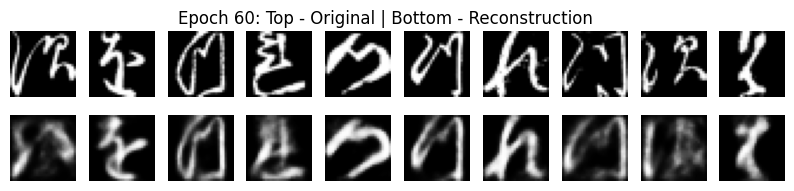

Epoch  61/100 | Train Loss: 209.2156 | Val Loss: 226.9286
Epoch  62/100 | Train Loss: 209.2763 | Val Loss: 227.0979
Epoch  63/100 | Train Loss: 209.1099 | Val Loss: 227.2328
Epoch  64/100 | Train Loss: 209.0731 | Val Loss: 227.4094
Epoch  65/100 | Train Loss: 209.0399 | Val Loss: 226.9960
Epoch  66/100 | Train Loss: 208.9491 | Val Loss: 227.0022
Epoch  67/100 | Train Loss: 208.8718 | Val Loss: 226.8742
Epoch  68/100 | Train Loss: 208.8434 | Val Loss: 227.3123
Epoch  69/100 | Train Loss: 208.7984 | Val Loss: 227.0564
Epoch  70/100 | Train Loss: 208.7486 | Val Loss: 227.1035
Epoch  71/100 | Train Loss: 208.6661 | Val Loss: 226.9232
Epoch  72/100 | Train Loss: 208.6298 | Val Loss: 227.2061
Epoch  73/100 | Train Loss: 208.5487 | Val Loss: 227.0263
Epoch  74/100 | Train Loss: 208.5543 | Val Loss: 227.1113
Epoch  75/100 | Train Loss: 208.4795 | Val Loss: 226.7670
Epoch  76/100 | Train Loss: 208.3980 | Val Loss: 226.6994
Epoch  77/100 | Train Loss: 208.3767 | Val Loss: 226.9914
Epoch  78/100 

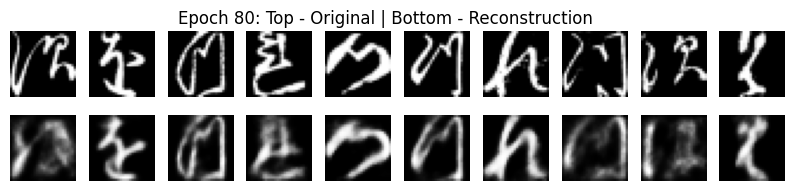

Epoch  81/100 | Train Loss: 208.2354 | Val Loss: 227.1896
Epoch  82/100 | Train Loss: 208.1841 | Val Loss: 226.9585
Epoch  83/100 | Train Loss: 208.1302 | Val Loss: 227.0364
Epoch  84/100 | Train Loss: 208.0562 | Val Loss: 227.0987
Epoch  85/100 | Train Loss: 208.0343 | Val Loss: 227.5233
Epoch  86/100 | Train Loss: 208.0229 | Val Loss: 227.2727
Epoch  87/100 | Train Loss: 207.9599 | Val Loss: 227.1546
Epoch  88/100 | Train Loss: 207.9168 | Val Loss: 226.9139
Epoch  89/100 | Train Loss: 207.8810 | Val Loss: 226.8970
Epoch  90/100 | Train Loss: 207.8389 | Val Loss: 227.1883
Epoch  91/100 | Train Loss: 207.8184 | Val Loss: 227.1928
Epoch  92/100 | Train Loss: 207.7718 | Val Loss: 227.0617
Epoch  93/100 | Train Loss: 207.7403 | Val Loss: 226.9690
Epoch  94/100 | Train Loss: 207.6708 | Val Loss: 227.2000
Epoch  95/100 | Train Loss: 207.6748 | Val Loss: 226.9765
Epoch  96/100 | Train Loss: 207.5967 | Val Loss: 227.3445
Epoch  97/100 | Train Loss: 207.6077 | Val Loss: 227.2809
Epoch  98/100 

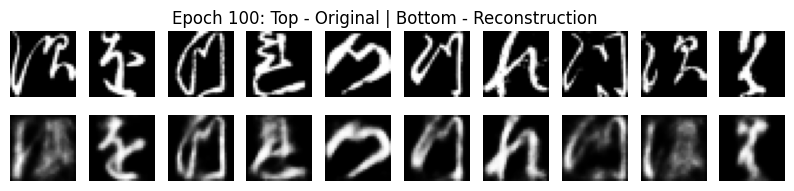

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(latent_dim=10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_losses = []
val_losses = []

epochs = 100
for epoch in range(1, epochs + 1):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(test_loader.dataset)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch:>3}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # Реконструкції кожні 20 епох (щоб наочно спостерігати процес навчання)
    if epoch % 20 == 0:
        with torch.no_grad():
            sample_data, _ = next(iter(test_loader))
            sample_data = sample_data.to(device)
            recon, _, _ = model(sample_data)
            recon = recon.view(-1, 1, 28, 28).cpu()

            plt.figure(figsize=(10, 2))
            for i in range(10):
                plt.subplot(2, 10, i + 1)
                plt.imshow(sample_data[i].cpu().squeeze(), cmap='gray')
                plt.axis('off')
                plt.subplot(2, 10, i + 11)
                plt.imshow(recon[i].squeeze(), cmap='gray')
                plt.axis('off')
            plt.suptitle(f"Epoch {epoch}: Top - Original | Bottom - Reconstruction")
            plt.show()

##4. Оцінка результатів

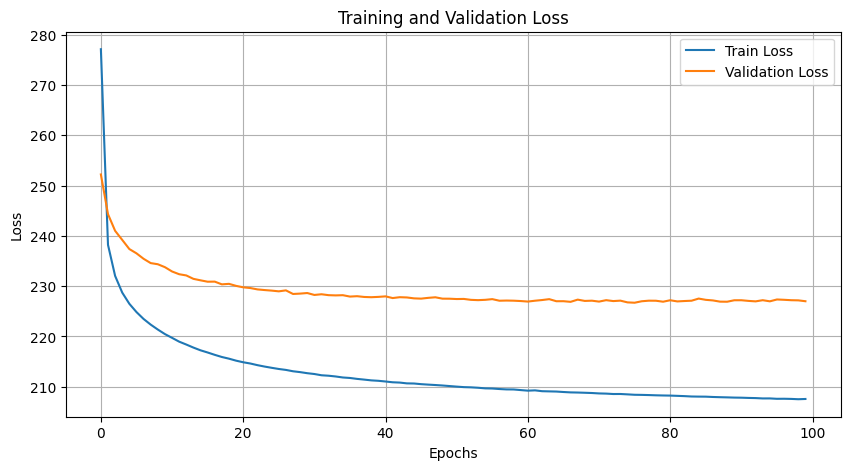

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

Модель навчається стабільно, бачимо узгоджене зниження як тренувальної, так і валідаційної втрати. Різниця між ними залишається стабільною та невеликою, без зростання валідаційної втрати => відсутність перенавчання.

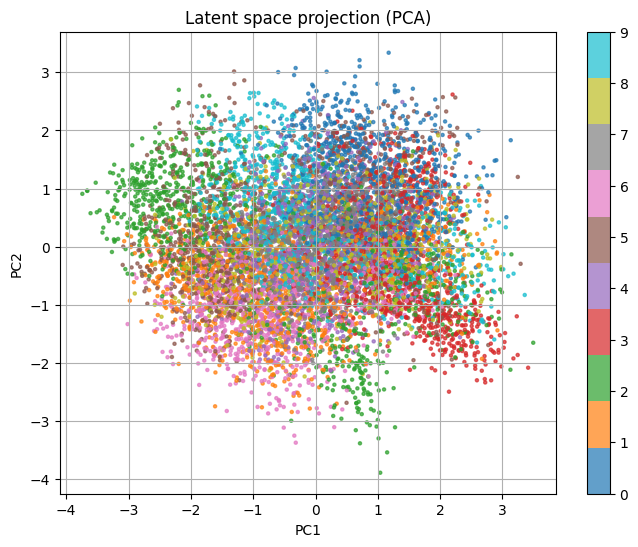

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model.eval()
all_z = []
all_labels = []

with torch.no_grad():
    for data, labels in test_loader:
        data = data.to(device)
        mu, _ = model.encode(data.view(-1, 28*28))
        all_z.append(mu.cpu())
        all_labels.append(labels)

z = torch.cat(all_z)
labels = torch.cat(all_labels)

# Зменшення до 2D
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)

# Візуалізація
plt.figure(figsize=(8, 6))
scatter = plt.scatter(z_pca[:, 0], z_pca[:, 1], c=labels, cmap='tab10', s=5, alpha=0.7)
plt.colorbar(scatter)
plt.title("Latent space projection (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

Латентний спейс візуалізували через PCA (10=>2). Бачимо локальні скупчення кольорів, тобто модель навчилась розділяти все-таки класи. Так, бачимо, що класи змішуються, але не хаотично, вони радше "перекриваються", що логічно для рукописних символів. Загалом можемо констатувати, що модель має достатню генеративну здатність

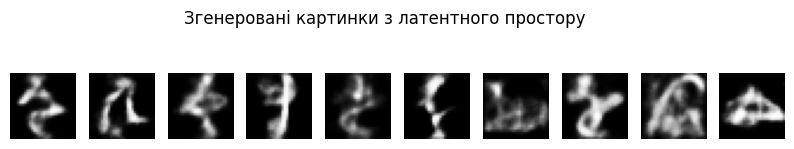

In [9]:
# Генеруємо випадкові зображення із нашого latent space

model.eval()

with torch.no_grad():
    z = torch.randn(10, model.fc21.out_features).to(device)
    generated = model.decode(z).view(-1, 1, 28, 28).cpu()

# Візуалізація
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(generated[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Згенеровані картинки з латентного простору")
plt.show()

Бачимо, що в принципі модель здатна генерувати доволі осмисленні зображення, що по структурі нагадують рукописні японські символи.

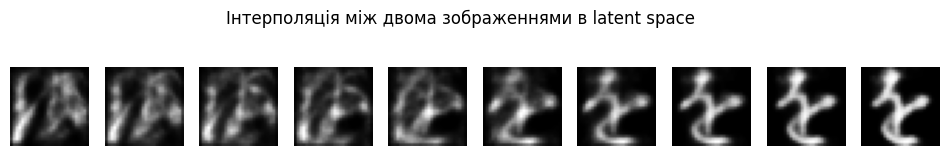

In [10]:
import numpy as np

model.eval()

# Вибираємо два приклади з тестового датасету
data_iter = iter(test_loader)
images, _ = next(data_iter)
img1 = images[0].unsqueeze(0).to(device)
img2 = images[1].unsqueeze(0).to(device)

with torch.no_grad():
    z1, _ = model.encode(img1.view(-1, 28*28))
    z2, _ = model.encode(img2.view(-1, 28*28))

# Створимо інтерполяцію
num_steps = 10
interpolated = torch.stack([
    (1 - alpha) * z1 + alpha * z2 for alpha in np.linspace(0, 1, num_steps)
]).to(device)

# Декодуємо назад у зображення
with torch.no_grad():
    generated = model.decode(interpolated).view(-1, 1, 28, 28).cpu()

# Візуалізуємо
plt.figure(figsize=(12, 2))
for i in range(num_steps):
    plt.subplot(1, num_steps, i + 1)
    plt.imshow(generated[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Інтерполяція між двома зображеннями в latent space")
plt.show()

Бачимо, що "розривів" немає і 1ше зображення плавно переходить в останнє. Тобто латентний простір неперервний, а значить VAE непогано натренований.

## **Можливі покращення:**
###1. Оптимізація VAE (дуже стандартні підходи, їх можна реалізовувати окремо і разом):

*   Збільшити кількість епох навчання або використати EarlyStopping для кращої збіжності.

*  Додати регуляризацію (наприклад, Dropout, L2).

*   Застосувати BatchNorm або глибшу мережу.

*   Змінити latent_dim для кращого балансу між генерацією і реконструкцією.

*   Використати бета VAE для більшої контрольованості латентного простору.



###2. Використання альтернативних моделей:


*   Використати якийсь інший тип VAE (не класичний): Conv-VAE / Conditional VAE.

*   Або перейти до Diffusion моделей чи GAN-підходів.







